In [1]:
%matplotlib

Using matplotlib backend: module://matplotlib_inline.backend_inline


# Linear regression model
### introduction

Recently I started studying machine learning and decided to create the simplest machine learning model - **linear regression**

#### what we need to know:
+ **outliers** - values ​​that are too small or large, which can spoil the training of the model, as a result of which the accuracy of the model will be spoiled, you should get rid of them
+ **IQR** - interquartile range, the difference between the 75th percentile and the 25th percentile in sorted data, helps get rid of outliers
+ **mean squared error (mse)** - metric for evaluating models
+ **r-squared (r2_score)** - metric to evaluate the performance of a regression model from 0 to 1

In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as s

In [3]:
train_df = pd.read_csv('assets/train.csv')
test_df = pd.read_csv('assets/test.csv')
train_df

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984
...,...,...
695,58.0,58.595006
696,93.0,94.625094
697,82.0,88.603770
698,66.0,63.648685


In [4]:
test_df

,x,y
0,77,79.775152
1,21,23.177279
2,22,25.609262
3,20,17.857388
4,36,41.849864
...,...,...
295,71,68.545888
296,46,47.334876
297,55,54.090637
298,62,63.297171


In [5]:
train_df.describe()

,x,y
count,700.000000,699.000000
mean,54.985939,49.939869
std,134.681703,29.109217
min,0.000000,-3.839981
25%,25.000000,24.929968
50%,49.000000,48.973020
75%,75.000000,74.929911
max,3530.157369,108.871618


In [6]:
test_df.describe()

,x,y
count,300.000000,300.000000
mean,50.936667,51.205051
std,28.504286,29.071481
min,0.000000,-3.467884
25%,27.000000,25.676502
50%,53.000000,52.170557
75%,73.000000,74.303007
max,100.000000,105.591837


### After seeing the description of the training and test data set, we found out the following:
#### train_df:
+ looking at the standard deviation and the maximum value we saw that there was an outlier in the training data set
+ looking at count we saw that there is still a value nan in the data set

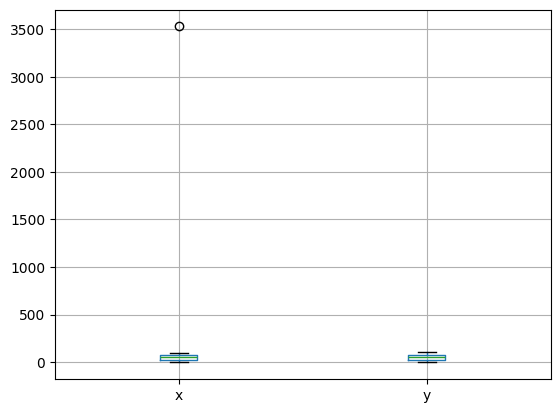

In [7]:
train_df.boxplot()
plt.show()

**as we can see, there really is an outlier here**
#### test_df:
+ there's nothing special

In [8]:
train_df.describe()

,x,y
count,700.000000,699.000000
mean,54.985939,49.939869
std,134.681703,29.109217
min,0.000000,-3.839981
25%,25.000000,24.929968
50%,49.000000,48.973020
75%,75.000000,74.929911
max,3530.157369,108.871618


In [9]:
train_df['y'] = train_df['y'].fillna(train_df['y'].mean())

# we got rid of the nan values, replacing them with the arithmetic mean of all data in the y-axis column

train_df.describe()

,x,y
count,700.000000,700.000000
mean,54.985939,49.939869
std,134.681703,29.088388
min,0.000000,-3.839981
25%,25.000000,24.985830
50%,49.000000,49.095828
75%,75.000000,74.880631
max,3530.157369,108.871618


In [10]:
# Now we get rid of outliers using the interquartile range

q1 = train_df['x'].quantile(0.25)
q3 = train_df['x'].quantile(0.75)
iqr = q3 - q1

upper_bound = 1.5 * iqr + q3

train_df['x'] = np.where((train_df['x'] > upper_bound), train_df['x'].mean(), train_df['x'])
train_df.describe()

,x,y
count,700.000000,700.000000
mean,50.021408,49.939869
std,28.934452,29.088388
min,0.000000,-3.839981
25%,25.000000,24.985830
50%,49.000000,49.095828
75%,75.000000,74.880631
max,100.000000,108.871618


<Axes: >

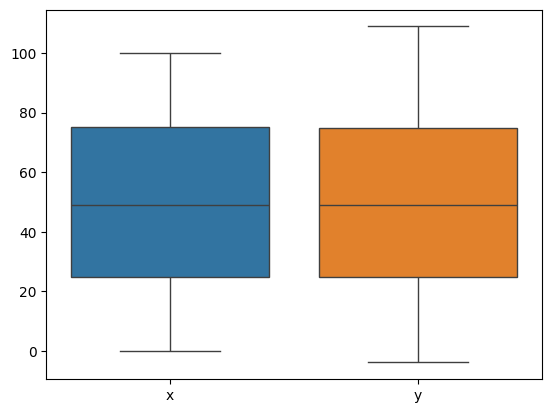

In [11]:
s.boxplot(data = train_df)

In [12]:
# now that the data is clean, we can start training the model

x_train, y_train = np.array(train_df['x']), np.array(train_df['y'])

x_test, y_test = np.array(test_df['x']), np.array(test_df['y'])

model = LinearRegression()
model.fit(x_train.reshape(-1,1), y_train)

LinearRegression()

In [13]:
y_pred = model.predict(x_test.reshape(-1,1))

mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)

'MSE: ',mse,'\nR2: ',r2

('MSE: ', np.float64(9.438800379606821), '\nR2: ', 0.9887944659791267)